# Práctico 5 - Procesamiento Digital de Imágenes

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve2d
from scipy.stats import norm

%matplotlib inline

In [4]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

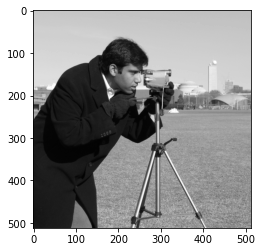

In [5]:
img = imageio.imread('imageio:camera.png')/255
plt.imshow(img, 'gray')

# 1. Filtros convolucionales

Para cada uno de los siguientes incisos implementar una función que devuelva el kernel en función de los parámetros especificados. Luego convolucionar la imagen con el kernel y utilizar la función plot_images_and_kernel() para graficar el resultado.

### 1.1. Implementar los siguientes filtros simétricos (invariantes a la rotación de 90°)

Pasabajos: Los kernels tendrán que ser del tamaño especificado por el usuario. Todos son de NxN donde N es impar.

1. Box (cuadrado) -> params: N
2. Circle (circular) -> params: N
3. Bartlett -> params: N
4. Gaussian -> params: N, std

Pasaaltos:

5. Laplace (4 y 8 vecinos) -> params: neighbors (entero que vale 4 u 8)
6. Pasaaltos a partir de un pasabajos: PA = Id - PB -> params: los mismos que el pasabajos elegido

Pasabanda:

7. Difference of Gaussian (DoG) -> params: N, std1, std2

Otros:

8. Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) -> params: los del pasaaltos y la constante de proporción de pasaaltos sumado

### 1.2. Implementar los siguientes filtros direccionales (asimétricos)

9. Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy y también en módulo y fase. Para graficar la fase, normalizar al rango [0,1] y utilizar un mapa de colores que no sea escala de grises.

### 1.3. Implementar un detector de bordes a partir del filtro de Sobel

Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s en los bordes y 0s en el resto

### 1.4. Escribir una breve descripción sobre cómo funciona el detector de bordes de Canny

In [6]:
from matplotlib import cm

def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


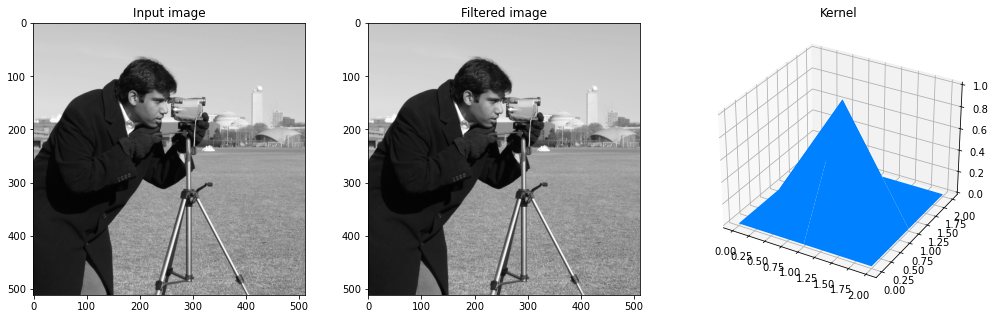

In [7]:
# Ejemplo del kernel identidad
kernel = np.zeros((3,3))
kernel[1,1] = 1
kernel /= kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


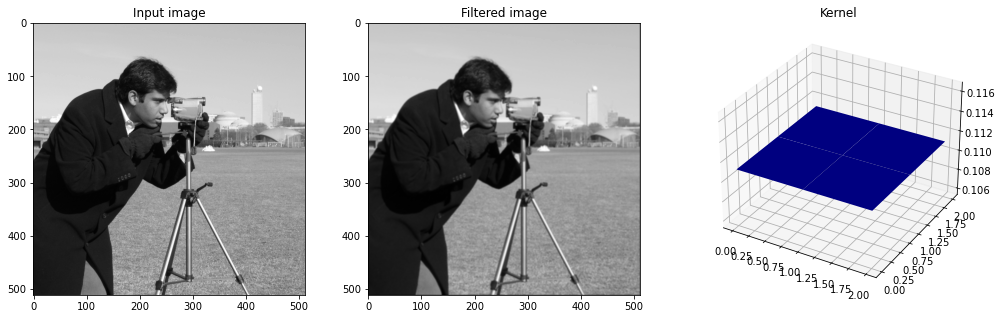

In [8]:
# Box (cuadrado) -> params: N
def box(N,kernel):
    kernel = np.zeros((N,N))
    kernel[:,:] = 1
    kernel /= kernel.sum()
    print(kernel)
    return(kernel)

filtro_box = box(3,kernel)
img_filt = convolve2d(img, filtro_box, 'same')

plot_images_and_kernel(img, img_filt, filtro_box)

In [9]:
#Circle (circular) -> params: N

def circle(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel[mask] = 1
    kernel /= kernel.sum()
    print(kernel)
    return kernel

[[0.         0.         0.07692308 0.         0.        ]
 [0.         0.07692308 0.07692308 0.07692308 0.        ]
 [0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
 [0.         0.07692308 0.07692308 0.07692308 0.        ]
 [0.         0.         0.07692308 0.         0.        ]]


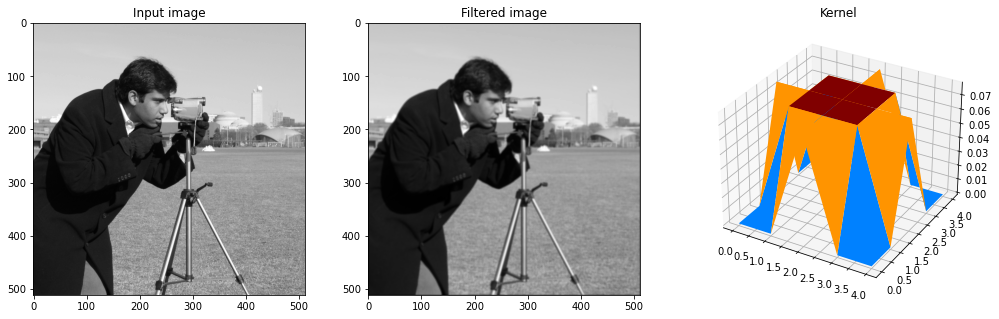

In [10]:
kernel_circular = circle(2)
img_filt = convolve2d(img, kernel_circular, 'same')

plot_images_and_kernel(img, img_filt, kernel_circular)

In [11]:
#BARTLETT
def bartlett(N):
    corrimiento = np.zeros((N,N))
    corrimiento[:,:] = 1
    print(corrimiento)
    kernel = np.outer(np.bartlett(N),np.bartlett(N)) + corrimiento
    kernel /= kernel.sum()
    print(kernel)
    return kernel


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]
 [0.03448276 0.04310345 0.05172414 0.04310345 0.03448276]
 [0.03448276 0.05172414 0.06896552 0.05172414 0.03448276]
 [0.03448276 0.04310345 0.05172414 0.04310345 0.03448276]
 [0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]]


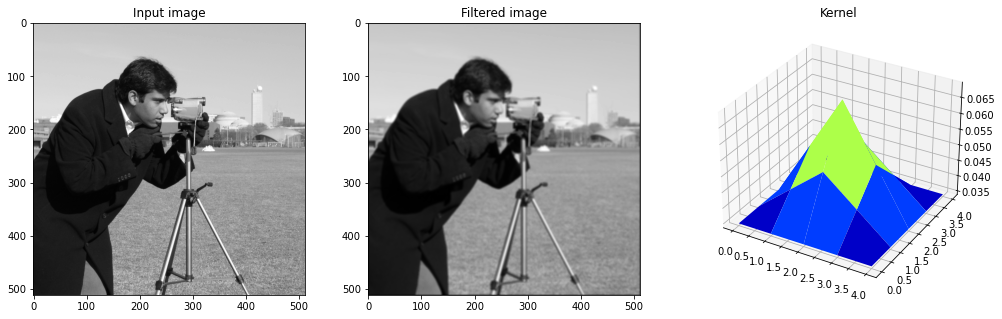

In [12]:
kernel_bartlett = bartlett(5)
img_filt = convolve2d(img, kernel_bartlett, 'same')

plot_images_and_kernel(img, img_filt, kernel_bartlett)

In [13]:
#Kernel Gaussiano
def gauss(N, std):
        kernel_gauss = norm.pdf(np.arange(N), (N-1)/2, std)
        kernel_gauss = np.outer(kernel_gauss, kernel_gauss)
        kernel_gauss = kernel_gauss/np.sum(kernel_gauss)
        
        return kernel_gauss

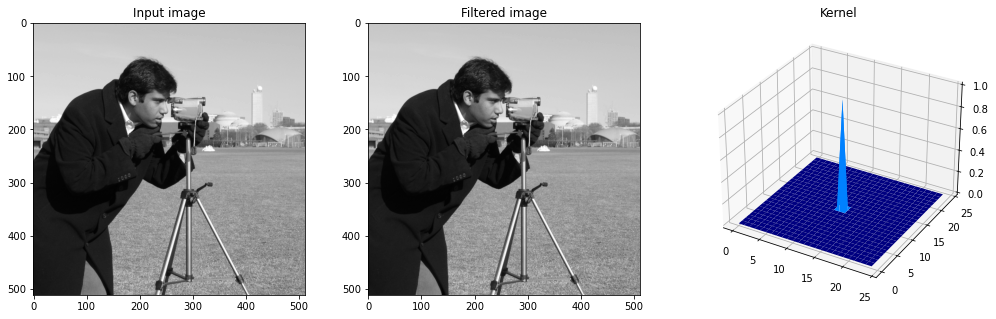

In [14]:
kernel_gauss = gauss(25, 0.001)
img_filt = convolve2d(img, kernel_gauss, 'same')

plot_images_and_kernel(img, abs(img_filt), kernel_gauss)

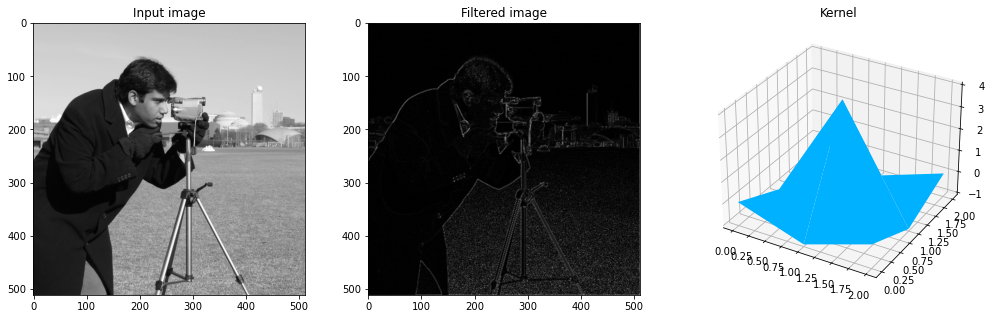

In [15]:
#KERNEL LAPLACIANO

kernel_laplaciano_4 = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]])

img_filt = convolve2d(img, kernel_laplaciano_4, 'same')

plot_images_and_kernel(img, abs(img_filt), kernel_laplaciano_4)

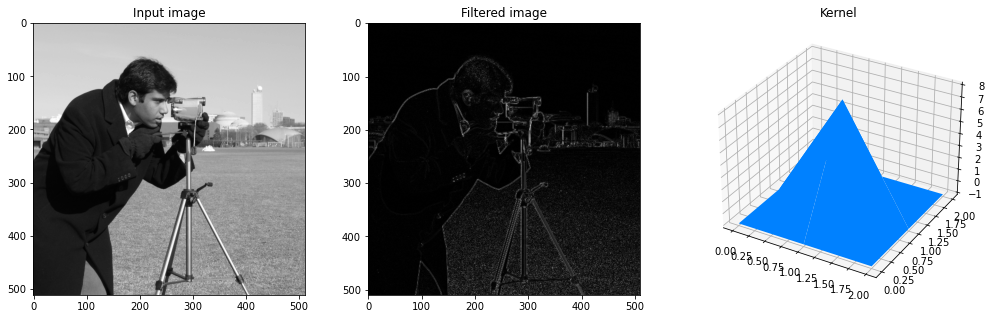

In [16]:
#KERNEL LAPLACIANO

kernel_laplaciano_8 = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])

kernel_laplaciano_8 = kernel_laplaciano_8

img_filt_laplace = convolve2d(img, kernel_laplaciano_8, boundary='wrap', mode='valid')

plot_images_and_kernel(img, abs(img_filt_laplace), kernel_laplaciano_8)

In [17]:
#Pasaaltos a partir de un pasabajos: PA = Id - PB -> params: los mismos que el pasabajos elegido

#---KERNEL IDENTIDAD---
def PA_Id_PB(N,std):

    kernel_Id = np.zeros((N,N))
    kernel_Id[int((N-1)/2),int((N-1)/2)] = 1
    kernel_Id /= kernel_Id.sum()
    
    print(kernel_Id)
    
    kernel_PA = kernel_Id -  gauss(N,std)
    
    return kernel_PA

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


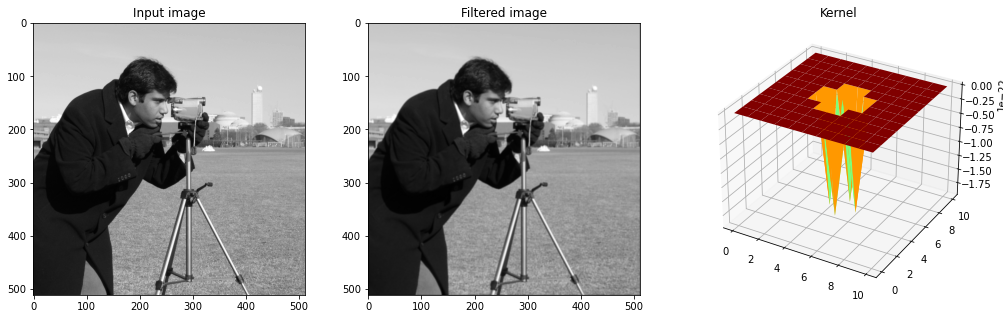

In [18]:
kernel_PA = PA_Id_PB(11, 0.1)
img_filt = convolve2d(img, kernel_PA, 'same')

plot_images_and_kernel(img, abs(img_filt), kernel_PA)

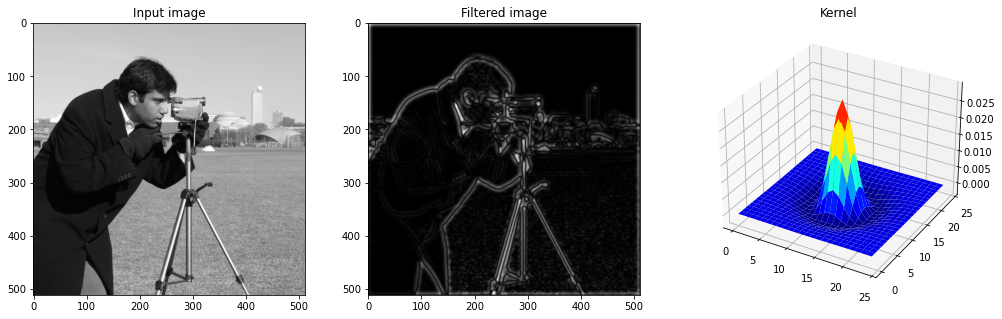

In [19]:
#Difference of Gaussian (DoG) -> params: N, std1, std2

kernel_diff_gauss = gauss(25,2)- gauss(25, 4)
img_filt = convolve2d(img, kernel_diff_gauss, 'same')

plot_images_and_kernel(img, abs(img_filt), kernel_diff_gauss)


In [20]:
#Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) ->
#params: los del pasaaltos y la constante de proporción de pasaaltos sumado

def mejora_contraste(N, std, k):
    kernel_Id = np.zeros((N,N))
    kernel_Id[int((N-1)/2),int((N-1)/2)] = 1
    kernel_Id /= kernel_Id.sum()
    print(kernel_Id)
    kernel_mejora = kernel_Id + (k*gauss(N,std))
    kernel_mejora = kernel_mejora/kernel_mejora.sum()
    
    print(kernel_mejora)
    
    return kernel_mejora

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0.01783288 0.01885164 0.01783288]
 [0.01885164 0.85326192 0.01885164]
 [0.01783288 0.01885164 0.01783288]]


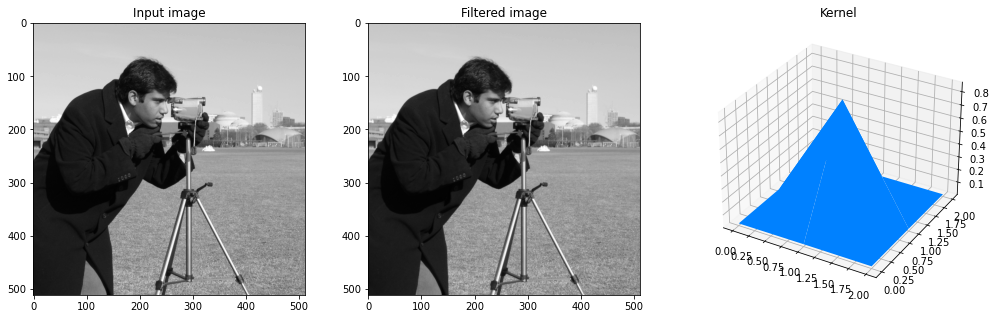

In [21]:
kernel_mejora = mejora_contraste(3,3,0.2)
img_filt = convolve2d(img, kernel_mejora, 'same')

plot_images_and_kernel(img, abs(img_filt), kernel_mejora)

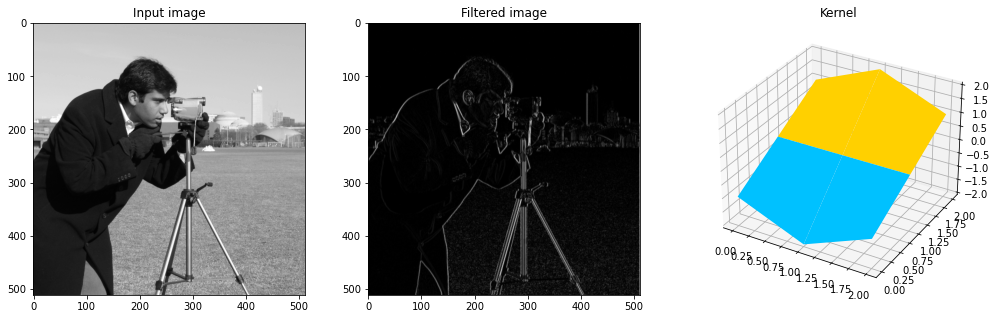

In [22]:
#Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy y también en módulo y fase. 
#Para graficar la fase, normalizar al rango [0,1] y utilizar un mapa de colores que no sea escala de grises.

#GRADIENTE Gx

kernel_Gx = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

Gx = convolve2d(img, kernel_Gx, 'same')

plot_images_and_kernel(img, abs(Gx), kernel_Gx)

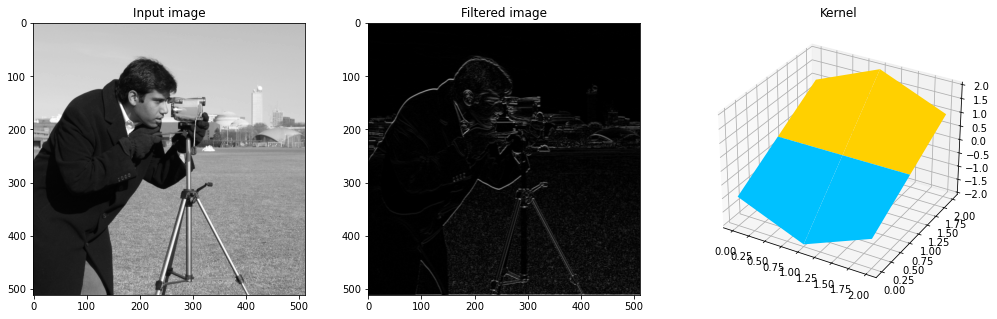

In [23]:
#Gradiente Gy
kernel_Gy = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])

Gy = convolve2d(img, kernel_Gy, 'same')


plot_images_and_kernel(img, abs(Gy), kernel_Gx)


In [24]:
mod_Gx_Gy = np.sqrt((Gy**2)+(Gx**2))
mod_Gx_Gy = mod_Gx_Gy / np.max(mod_Gx_Gy)

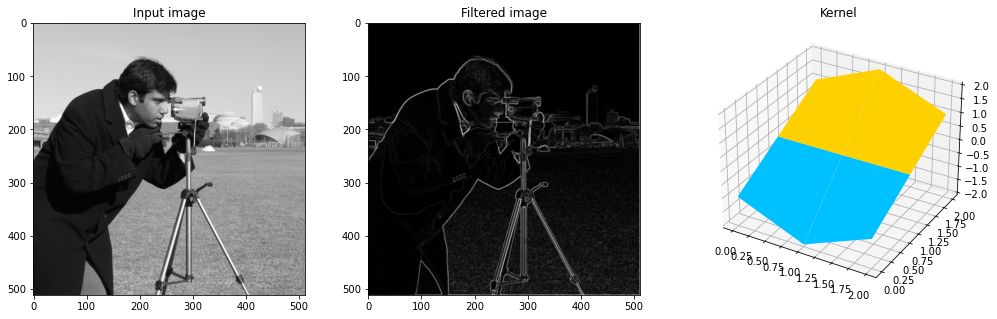

In [25]:
plot_images_and_kernel(img, mod_Gx_Gy, kernel_Gx)

In [26]:
#agrego esta matriz aux porque no puedo dividir por cero algunos elementos.
aux = 0.0000000001*np.ones(np.shape(Gx))
Gxx = Gx + aux


In [27]:
fase = np.arctan(Gy/Gxx)
fase = fase/(2*np.pi)

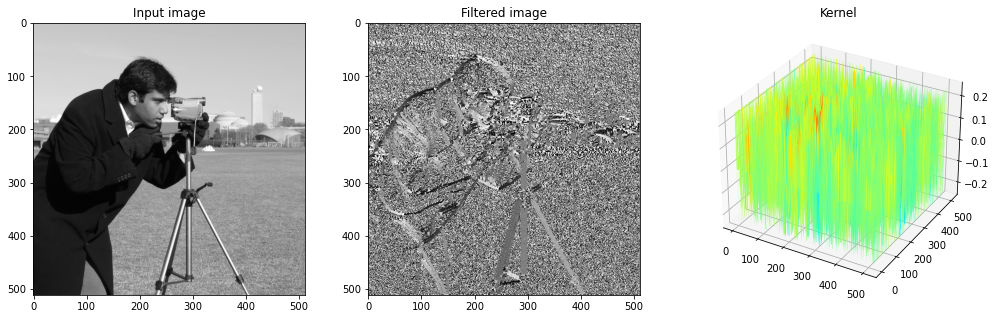

In [28]:
plot_images_and_kernel(img, fase, fase)

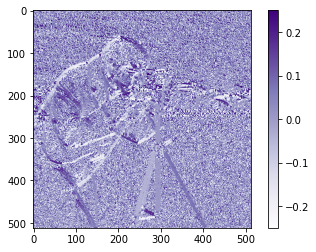

In [29]:
#plt.pcolormesh(fase, cmap = "Paired");
plt.imshow(fase, cmap = "Purples");
#Purples
plt.colorbar();

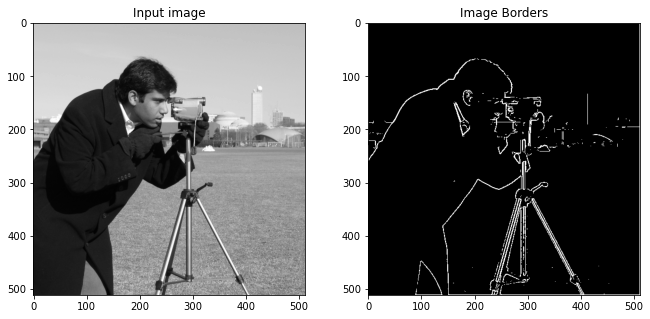

In [30]:
#1.3. Implementar un detector de bordes a partir del filtro de Sobel

#utilizo el modulo ya normalizado: mod_Gx_Gy

def plot_images_bordes_v0(img, img_bord):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_bord, 'gray')
    ax2.title.set_text('Image Borders')

mask = np.where(mod_Gx_Gy>0.3,255,0)

#grafico la imagen
plot_images_bordes_v0(img, mask)

##### 1.4. Escribir una breve descripción sobre cómo funciona el detector de bordes de Canny

El detector de bordes Canny funciona a través de la detección de bordes SOBEL mediante la primera derivada. Luego se filtra los bordes que cumplan cierta condición, en bordes Canny aquellos que tengan como grosor 1. 
    Por último se aplica un UMBRAL POR HISTERESIS, esto es, establecer un umbral por el cúal se decide si un pixel forma parte del objeto o del fondo.  Al contrario que el umbral simple, el umbral por histéresis se centra en establecer dos umbrales, uno máximo y otro mínimo:
    - Si el valor del píxel es mayor que el umbral máximo, el píxel se considera parte del borde.
    - Un píxel se considera que no es borde si su valor es menor que el umbral mínimo,
    - Si está entre el máximo y el mínimo, será parte del borde si está conectado con un píxel que forma ya parte del borde.